# Homework 05

## Due Tuesday, March 29th

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import shapely.geometry
import shapely.ops

### 1. Flyover states

_[This is very similar to the exercise done in class. This is a continuation.]_

What states do you see when you fly from LA (airport code LAX) to NYC (airport code EWR)?

> LAX: 33.9425° N, 118.4081° W

> EWR: 40.6925° N, 74.1686° W

Load in the `states_21basic` shapefile using these commands:

    from mpl_toolkits.basemap import Basemap
    m = Basemap(llcrnrlon=-150.,llcrnrlat=20.,
            urcrnrlon=-50.,urcrnrlat=50.,
            rsphere=(6378137.00,6356752.3142),
            resolution='l',projection='merc',
            lat_0=40.,lon_0=-100.,lat_ts=20.)
    m.readshapefile('../materials/states_21basic/states', 'states')

The boundary information for all of the states is now held in an attribute of the map object `m.states`, which is a list of lists of x-y pairs denoting the boundaries. Next use the `m.gcpoints` function to get the points along the great circle path. Convert all of these things into Shapely objects, and check for intersections. Add a buffer of 100km to the flight path to see what states you might potentially see along the way. Use this analysis to provide the following:

1. Create and display a map that shows the flight path, with the states that are seen along the flight path clearly highlighted in some way.

2. Use the information in m.states_info to extract and print a list containing the names of the states seen, with unique names. (see `np.unique`)


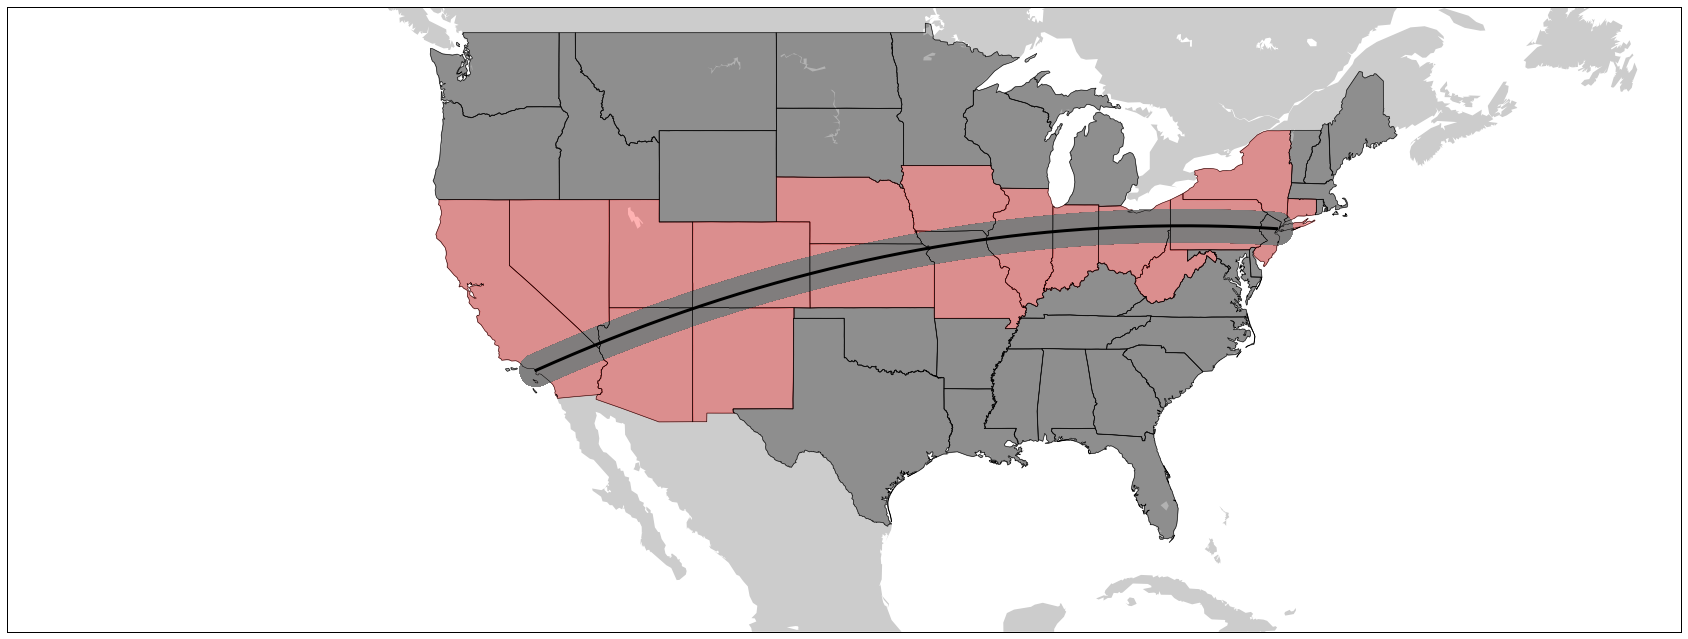

In [33]:

plt.figure(figsize=(30,30))

from mpl_toolkits.basemap import Basemap
m = Basemap(llcrnrlon=-150.,llcrnrlat=20.,
        urcrnrlon=-50.,urcrnrlat=50.,
        rsphere=(6378137.00,6356752.3142),
        resolution='l',projection='merc',
        lat_0=40.,lon_0=-100.,lat_ts=20.)
m.readshapefile('C:\Users\Scott\Documents\GitHub\python4geosciences\materials\states_21basic\states', 'states')


x,y = m.gcpoints(-118.4081, 33.9425, -74.1686, 40.6925, 1000)
m.fillcontinents()
plt.plot(x,y,'-k',lw=3)


states = shapely.ops.linemerge(m.states)
xy = zip(x, y)
line = shapely.geometry.LineString(xy)

point=[]
for i in range(0,len(x)):
    point.append(shapely.geometry.Point(x[i], y[i]))
line = shapely.geometry.LineString(point).buffer(100000)

intersections = [poly.intersects(line) for poly in states]
poly=[]
for state in m.states:
    poly.append(shapely.geometry.Polygon(state))
List = []
for poly in states:
    if poly.intersects(line):
        color = 'r'
    else:
        color = 'k'
    coords = shapely.ops.cascaded_union(poly).coords[:]
    x, y = zip(*coords)
    plt.fill(x, y, color=color, alpha=0.3)
    plt.fill(*line.boundary.xy, color='gray', alpha=0.3)


#Dr. Thyng, I just was not able to figure out how to get the list of states. It has to do with the states_info info down below. 

In [43]:
poly.append?


Object `poly.append` not found.


In [13]:
xy = zip(x, y)


In [37]:
#m.states
#len(m.states)
#m.states_info


### 2. Area in a Voronoi diagram

Given the series of points:

     np.array([[ 0.77354201,  0.34072038],
               [ 0.43807549,  0.93001924],
               [ 0.5624092 ,  0.79438991],
               [ 0.02536295,  0.46180244],
               [ 0.59533179,  0.07522803],
               [ 0.47867418,  0.70302822],
               [ 0.30371564,  0.83135442],
               [ 0.5856915 ,  0.16340903],
               [ 0.14700491,  0.60268997],
               [ 0.97098631,  0.51692456]])
               
create a Voronoi diagram, and calculate the area contained in the finite regions. What fraction of the total area is at least 0.001 unit away from any boundary? 0.01 away? And 0.1 away?


The area of the finite region is 1.01389122133.
The area for a .01 buffer is 0.0924424566394.
The area for a .001 buffer is 0.865253615351.
The area for a .0001 buffer is 0.986090261784.


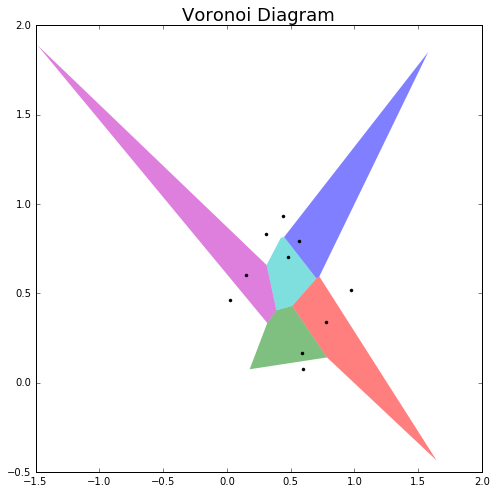

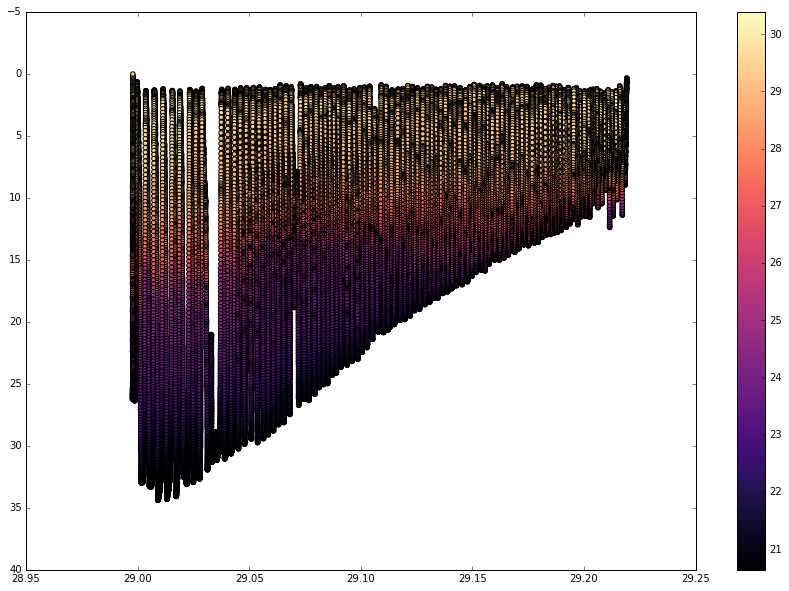

In [51]:
from scipy import spatial
from sympy import polys
plt.figure(figsize=(8,8))

xx = np.array([[ 0.77354201,  0.34072038],
           [ 0.43807549,  0.93001924],
           [ 0.5624092 ,  0.79438991],
           [ 0.02536295,  0.46180244],
           [ 0.59533179,  0.07522803],
           [ 0.47867418,  0.70302822],
           [ 0.30371564,  0.83135442],
           [ 0.5856915 ,  0.16340903],
           [ 0.14700491,  0.60268997],
           [ 0.97098631,  0.51692456]])

vor = spatial.Voronoi(xx)

for indices in vor.regions:
    if not indices: continue     
    if -1 in indices: continue
    plt.fill(vor.vertices[indices, 0], vor.vertices[indices, 1], edgecolor='none', alpha=0.5)

plt.plot(xx[:, 0], xx[:, 1], '.k') 
plt.title('Voronoi Diagram', size=18)

lines = [shapely.geometry.LineString(vor.vertices[line]) for line in vor.ridge_vertices if -1 not in line]

poly = []
area=0
B01=0
B001=0
B0001=0

for poly in shapely.ops.polygonize(lines):
    #polys.append(poly)
    area+=poly.area
    B01+=poly.buffer(-0.1).area
    B001+=poly.buffer(-0.01).area
    B0001+=poly.buffer(-0.001).area
    
print('The area of the finite region is ' + str(area)+ '.')  
print('The area for a .01 buffer is ' + str(B01/area)+ '.')
print('The area for a .001 buffer is ' + str(B001/area)+ '.')
print('The area for a .0001 buffer is ' + str(B0001/area)+ '.')


plt.figure(figsize=(15,10))

f = np.genfromtxt('MS03_L15.txt', skip_header=114) 
lat = f[:,0]
temp = f[:,15]
dep = f[:,2]

cb = plt.scatter(lat, dep, c=temp, cmap='magma')
plt.gca().invert_yaxis()
a = plt.colorbar(cb)
#a.set_label('Temperature [°C]', size=17)
#plt.ylabel('Depth (m)', size=17)
#plt.xlabel('Latitude', size=17)
#plt.ylim((34,0))

### 3. 2D interpolation

Data (found in `python4geosciences/data/MS03_L15.txt`) gathered from a field cruise out of the TAMU Oceanography department is randomly located in space (that is, unstructured) because of the nature of the measurement: the instrument is lowered into the water from a ship, and is brought up and down through the water column as the ship moves to get a sampling of the fields.

Read in the data file and plot the temperature in a `scatter` plot as a function of depth and latitude. Next, interpolate the temperature data to be on a uniform grid (to make it structured). Now, plot it using `contourf`, which requires structured data. Experiment with different spacing in your uniform grid, and with different numbers of contours to see how the results change, and choose values that provide a nice-looking image which closely resembles the original data.

In [52]:
MS03 = open('MS03_L15.txt', 'r')


#Dr. Thyng, I apologize, but I am trying my very best to learn this info and be productive in this class. I have never had a such\
# a hard time learning material for a class. I still believe its due to the double dose of MatLab and Python programming that I\
# have no experience with.

In [48]:
x = np.arange(min lat)

X, Y = np.meshgrid(x, y)

SyntaxError: invalid syntax (<ipython-input-48-c571be0b6f5b>, line 1)